# Module 6. Data Cleaning and Preparation

Large portion of Data Analysis is taken up by preparation: loading, cleaning, transforming and rearranging.

These tasks take up more than 80% of an analyst's time depending on the data that you work on. This is because the way the data is stored in files or databases is not in the right format.

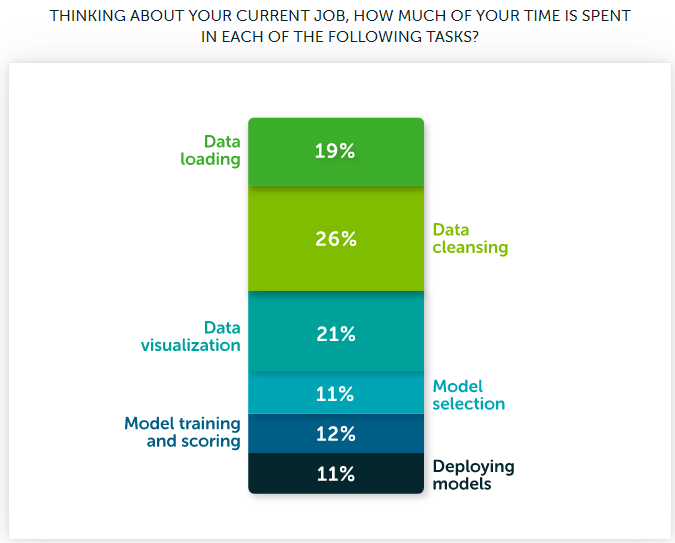

<sub><sup>[Retrieved from [2020 State of Data Science report](https://www.anaconda.com/state-of-data-science-2020?utm_medium=press&utm_source=anaconda&utm_campaign=sods-2020&utm_content=report) of Anaconda]</sub></sup>

`pandas` with built-in Python features provides high-level, flexible abd fast set of tools that enables you to manipulate data into right form.

# 1. Handling missing data

Missing data occurs commonly in many data analysis applications. For example, some logs might be corrupted or the system might crush and fail to collect user interaction data.

When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

One of the goals of `pandas` is to make working with missing data as painless and efficient as possible. For example, all of the descriptive statistics on `pandas` objects exclude missing data by default.

In pandas, missing data is referred to as **NA**, which stands for *not available*.

For numeric data, pandas uses the floating-point
value `NaN` (**Not a Number**) to represent missing data.

The following example creates a Series object with one missing value.

In [ ]:
import pandas as pd
import numpy as np

string_data = pd.Series(['aardvak', 'artichoke', np.nan, 'avocado'])
string_data

0      aardvak
1    artichoke
2          NaN
3      avocado
dtype: object

There are multiple ways to create a missing data. In addition to `np.nan` that we used above, you can also use built-in Python `None` value or the `NA` object that comes with pandas. However, most of the time `np.nan` will be quite sufficient.

In [ ]:
string_data[0] = None #python builtin value
string_data[1] = pd.NA #pandas missing value

You can use `isnull` function to return a boolean same-sized object  indicating if the values are `NA`. NA values, such as `None` or `numpy.NaN`, gets mapped to `True` values. Everything else gets mapped to `False` values.

In [ ]:
string_data.isnull()

0     True
1     True
2     True
3    False
dtype: bool

There are several functions in pandas for handling missing data, as listed in the following table. In the subsequent section, these functions are covered.

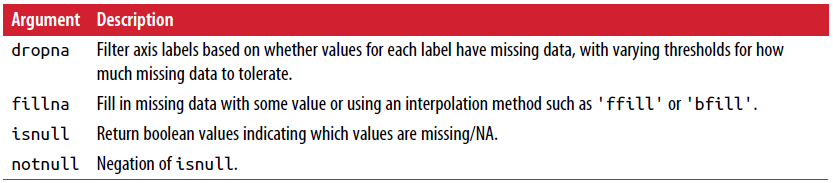

## 1.1. Filtering Out Missing Data

We always have the option to filter out missing data by hand using `isnull` and boolean indexing.



In [ ]:
string_data[string_data.notnull()]

3    avocado
dtype: object

However, for getting rid of the null values the `dropna` function is the most preferred method.

For a Series it returns the Series with only non-null data and index values.

In [ ]:
string_data.dropna()

3    avocado
dtype: object

When creating a missing value, you can avoid typing `np.nan` by importing the `nan` object with an abbreviation (such as `NA`).

Here is how you can do it:

In [ ]:
from numpy import nan as NA

For DataFrame, droping a row (or column) is a bit more complex.

By default, `dropna` will drop any row that contains even 1 missing value.

Let's build a new dataframe with some missing value and apply the `dropna` function on it.

As you see below, we can just write `NA` to indicate missing values.

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.],
                     [1., NA, NA],
                     [NA, NA, NA],
                     [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Now we can apply `dropna` to clean the missing values. This will remove all rows and columns where at least there is one missing value.

In [ ]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


You can delete the rows only if the all column values are missing by passing `how='all'`

In [ ]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


You can also apply the same procedure on columns. Before we try it, let's first create a new column with all NA values.

In [ ]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


Regarding the code above: In Pandas, when you use square brackets ([]) with an integer inside, it is interpreted as a reference to a column, not a row. This is to maintain consistency with the way data is typically organized in tabular structures, where columns are identified by labels or indices.

If you want to select a specific row by its index, you typically use the loc accessor. For example, the following statement will select  a specific row by index:

`row_2 = data.loc[2]`


To drop columns, all you need to do is to pass `axis=1`. The following code will delete Column 4 (since it has only NA values).

In [ ]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


A very useful way to filter out DataFrame rows is to keep the rows with a certain number of non-missing values.  

You can indicate this number with the `thresh` argument:

Let's build a dataframe and try the `thresh` argument.

In [ ]:
df = pd.DataFrame(np.random.randn(7,3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA

df

,0,1,2
0,-2.056737,NaN,NaN
1,0.722045,NaN,NaN
2,1.192702,NaN,1.031435
3,0.179642,NaN,1.754117
4,0.665097,0.996054,1.254051
5,-0.071556,1.140204,-0.139397
6,0.130148,0.673429,-0.439194


First, apply dropna and check the output.

In [ ]:
df.dropna()

,0,1,2
4,0.665097,0.996054,1.254051
5,-0.071556,1.140204,-0.139397
6,0.130148,0.673429,-0.439194


Now, pass `thresh=2` to dropna function and observe the results.

The rows with at least 2 non-missing values should be retained.

In [ ]:
df.dropna(thresh=2)

,0,1,2
2,1.192702,NaN,1.031435
3,0.179642,NaN,1.754117
4,0.665097,0.996054,1.254051
5,-0.071556,1.140204,-0.139397
6,0.130148,0.673429,-0.439194


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

As the in-class exercise we will work on a dataset which includes students' visits to different modules on a specific course day.

Please import the data using `read_excel` function:

(1000, 3)


,StudentId,CourseDay,Modules
0,20,35.0,2.0
1,19,31.0,5.0
2,2,40.0,3.0
3,9,35.0,1.0
4,7,44.0,2.0


For a proper analysis with this dataset, we have to identify the students and the course day.

Therefore, we want to remove any row where either `StudentId` or `CourseDay` datata is missing.

(994, 3)

## 1.2. Filling In Missing Data
Sometimes it is not a good idea to remove NAs since you would lose some important information in the same rows along with the deleted missing data.

Another option is to **fill** in the NAs in different ways.

For example, by using `fillna` function, you can pass a scalar value to replace all missing values with.

In [ ]:
df.fillna(0)

,0,1,2
0,-2.056737,0.000000,0.000000
1,0.722045,0.000000,0.000000
2,1.192702,0.000000,1.031435
3,0.179642,0.000000,1.754117
4,0.665097,0.996054,1.254051
5,-0.071556,1.140204,-0.139397
6,0.130148,0.673429,-0.439194



If we call `fillna` with a dict, we can fill different value for each column.

In [ ]:
df.fillna({1:0.5, 2: 0})

,0,1,2
0,-2.056737,0.500000,0.000000
1,0.722045,0.500000,0.000000
2,1.192702,0.500000,1.031435
3,0.179642,0.500000,1.754117
4,0.665097,0.996054,1.254051
5,-0.071556,1.140204,-0.139397
6,0.130148,0.673429,-0.439194


By default it returns a new object, but we can modify it to change in-place.


In [ ]:
df.fillna(0, inplace=True)
df

,0,1,2
0,-2.056737,0.000000,0.000000
1,0.722045,0.000000,0.000000
2,1.192702,0.000000,1.031435
3,0.179642,0.000000,1.754117
4,0.665097,0.996054,1.254051
5,-0.071556,1.140204,-0.139397
6,0.130148,0.673429,-0.439194


The same interpolation methods available for reindexing can be used with `fillna`. Let's first create a dataframe:

In [ ]:
df = pd.DataFrame(np.random.randn(6,3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-0.450105,1.543588,-0.174925
1,-1.766967,1.395191,-0.712856
2,0.620955,NaN,-1.416465
3,0.232588,NaN,-0.703736
4,-0.703728,NaN,NaN
5,-1.338431,NaN,NaN


For example you can apply forward-fill method by passing `method='ffill'` argument inside the `fillna` function:

In [ ]:
df.fillna(method='ffill')

,0,1,2
0,-0.450105,1.543588,-0.174925
1,-1.766967,1.395191,-0.712856
2,0.620955,1.395191,-1.416465
3,0.232588,1.395191,-0.703736
4,-0.703728,1.395191,-0.703736
5,-1.338431,1.395191,-0.703736


You can limit forward-filling by using the `limit` argument. For example passing `limit=2` should fill only the next two row cells.

In [ ]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.450105,1.543588,-0.174925
1,-1.766967,1.395191,-0.712856
2,0.620955,1.395191,-1.416465
3,0.232588,1.395191,-0.703736
4,-0.703728,NaN,-0.703736
5,-1.338431,NaN,-0.703736


With `fillna` you can do lots of other things with a little creativity.

For example, you might pass the mean or median value of a Series:

In [ ]:
data = pd.Series([1., NA, 3.5, NA, 7])

data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

See the following table for the arguments of `fillna`.

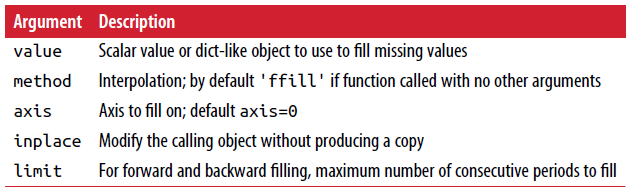

<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

Previously we have checked for the NA values in the student id or course day columns.

However, there might be some missing values also in the Modules column.

You can use `any` function along with `isnull` to determine this:

True

Then, let's obtain the total number of records with missing Moduels value:

6

We will fill these missing values using `ffill` technique. Before that, we will sort the data based on day and student.

,StudentId,CourseDay,Modules
570,1,1.0,2.0
979,1,1.0,6.0
580,1,2.0,1.0
305,1,4.0,4.0
942,1,4.0,5.0
196,1,6.0,2.0
500,1,6.0,5.0
126,1,7.0,5.0
259,1,7.0,3.0
729,1,7.0,1.0


Now, we can fill the missing values using `ffill` technique.

Check again to make sure all missing values are being filled:

False

# 2. Dealing with Duplicates

Many times your data will have duplicate rows (i.e., duplicate data). `pandas` offers a variety of functions to deal with them.

Let's first create a `DataFrame` with duplicate rows:

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                    'k2': [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The DataFrame method `duplicated` returns a boolean Series object indicating if each (*entire*) row is a duplicate (i.e. observed in a previous row) or not. That means, by default all of the columns are considered when determining the duplicate rows.

In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

You could use this boolean Series to filter out the duplicate values as shown below.

In [ ]:
data[data.duplicated() == False]

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


A better approach is to use `drop_duplicates` to get rid of the duplicate rows.

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


You can also specify any subset of the DataFrame to detect duplicates.

In [ ]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


By default,  the *first observation* is kept in case of duplicates. We can specify `keep='last'` to instead keep the *last* observation.

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

In the student visits data, we will consider a student's visits to the same module on the same day as a possible duplicate.

We should drop such duplicate records:

In [ ]:
print(studentVisits.shape)
studentVisits = studentVisits.drop_duplicates(keep='last');
print(studentVisits.shape)

(994, 3)
(917, 3)


# 3. Using a Function or Mapping

We sometimes need to make transformations based on the values present in an array, Series or column in a DataFrame. For example, you can add an additional column to insert more information or change and existing column.

We can use the `map` method with a `dict-like` object having the mapping to add or change a column.

For example, below we generate a new data holding student population for different departments.

In [ ]:
data = pd.DataFrame({'department': ['CEIT', 'eds', 'Eece',
                             'ceng', 'CE', 'Chem',
                            'ae', 'Hist', 'pes'],
                    'student population': [200, 250, 240, 350, 355, 290, 265, 310, 300]})
data

,department,student population
0,CEIT,200
1,eds,250
2,Eece,240
3,ceng,350
4,CE,355
5,Chem,290
6,ae,265
7,Hist,310
8,pes,300


We have the following dictionary that holds the mapping data between the departments and their faculties.

In [ ]:
dept_to_facult = {
    'ceit': 'Education',
    'eece': 'Education',
    'eds': 'Education',
    'pes': 'Education',
    'ceng': 'Engineering',
    'ce': 'Engineering',
    'ae': 'Engineering',
    'chem': 'Art and Sciences',
    'hist': 'Art and Sciences'
}

Our goal is to insert the Faculty information to our dataset as a new column. The final dataframe should look like this:

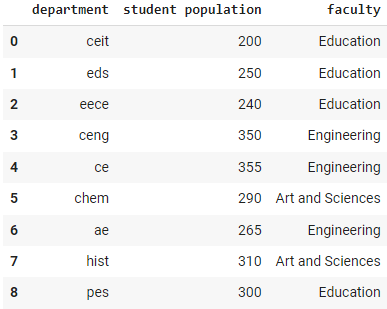

However, we have a small problem. You might have noticed that in our dataset department names have a varying case (mix of lowercases and uppercases), whereas in our mapping data all of them are lowercase.

In this case, we need to convert all the column values to lowercase using the `str.lower` Series method.

In [ ]:
data['department'] = data['department'].str.lower()
data

,department,student population
0,ceit,200
1,eds,250
2,eece,240
3,ceng,350
4,ce,355
5,chem,290
6,ae,265
7,hist,310
8,pes,300


In [ ]:
data['faculty'] = data['department'].map(dept_to_facult)
data

,department,student population,faculty
0,ceit,200,Education
1,eds,250,Education
2,eece,240,Education
3,ceng,350,Engineering
4,ce,355,Engineering
5,chem,290,Art and Sciences
6,ae,265,Engineering
7,hist,310,Art and Sciences
8,pes,300,Education


Optionally, you could write a `lambda` expression to perform all the tasks at once:

In [ ]:
data['faculty'] = data['department'].apply(lambda x: dept_to_facult[x.lower()])
data

,department,student population,faculty
0,ceit,200,Education
1,eds,250,Education
2,eece,240,Education
3,ceng,350,Engineering
4,ce,355,Engineering
5,chem,290,Art and Sciences
6,ae,265,Engineering
7,hist,310,Art and Sciences
8,pes,300,Education


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

We have students' grade data in the following dictionary. Based on this data, we want to add the grade column to student visits dataframe.

In [ ]:
studentIdToGrade = {
   1: 40,
   2: 30,
   3: 80,
   4: 60,
   5: 40,
   6: 90,
   7: 70,
   8: 20,
   9: 90,
   10: 90,
   11: 80,
   12: 60,
   13: 90,
   14: 20,
   15: 70,
   16: 60,
   17: 85,
   18: 60,
   19: 85,
   20: 75,
}

,StudentId,CourseDay,Modules,grade
570,1,1.0,2.0,40
979,1,1.0,6.0,40
580,1,2.0,1.0,40
305,1,4.0,4.0,40
942,1,4.0,5.0,40
...,...,...,...,...
261,20,40.0,2.0,75
956,20,41.0,5.0,75
67,20,42.0,3.0,75
438,20,44.0,2.0,75


# 4. Replacing Values

You may remember that we can use the `fillna` method for a special case of more general values replacement: *missing values*.

Although the `map` function modifies a subset of values, `replace` provides simpler and more flexible way to do so.

Let's create a `Series` object to work with:

In [ ]:
data = pd.Series([1., -999., 2., -999., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      3.0
dtype: float64

The -999 values might be sentinel values for missing data. To replace these with NA values that pandas understands, we can use `replace`, producing a *new* Series (unless you pass `inplace=True`):

In [ ]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

If you want to replace multiple values at once, you instead pass a list and then the substitute value:

In [ ]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

To use a different replacement for each value, pass a list of substitutes:

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

The argument passed can also be a dict:

In [ ]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
dtype: float64

# 5. Renaming Columns and Row Indices

Just like values, axis labels can also be transformed by a function or mapping to produce differently labeled objects.

Let's first create our sample data which holds students' video activities:

In [ ]:
np.random.seed(5)
data = pd.DataFrame(np.random.randint(50, size=12).reshape((3,4)),
                   index = ['e123432', 'E321233', 'e983293'],
                   columns = ['play', 'pause', 'backward', 'forward'])
data

,play,pause,backward,forward
e123432,35,14,47,38
E321233,16,9,8,36
e983293,39,27,48,30


In this dataset, student id is the index of the DataFrame. What we want is to get rid of the initial letters in the id numbers.

For this purose let's write a lambda function. This function will actually select a substring starting from the second letter.

In [ ]:
transform = lambda x: x[1:]

Now we can apply this function to the indices by calling **`map`** method for `data.index` values.

In [ ]:
data.index = data.index.map(transform)
data

,play,pause,backward,forward
123432,35,14,47,38
321233,16,9,8,36
983293,39,27,48,30


The same task could be completed using `str.slice` method as well. This method returns a substring starting from and ending at indicated indices.

For example, the following code will take a substring starting from the second letter (index 1):

In [ ]:
data.index.str.slice(1)

Index(['23432', '21233', '83293'], dtype='object')

Alternatively, you can use the `rename` function to change the names of row indices or columns.

The advantage of `rename` is that you can directly pass the str functions as arguments.

For example, the following code will convert all column names to uppercase:

In [ ]:
data.rename(columns=str.upper)

,PLAY,PAUSE,BACKWARD,FORWARD
123432,35,14,47,38
321233,16,9,8,36
983293,39,27,48,30


In the code above, you could pass any string function that does not require parameter and that returns the copy of the modified string, such as `lower`, `strip`, `lstrip`, `rstrip`.

`rename` is very commonly used to change specific row index or column name using a dict-like syntax as shown below:

In [ ]:
data.rename(index={'123432':"123433"},
           columns = {'play':'PLAY'})

,PLAY,pause,backward,forward
123433,35,14,47,38
321233,16,9,8,36
983293,39,27,48,30
